In [3]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
import random
from skimage.transform import resize
import cv2

In [4]:
height = 512
width = 512

# Reading images
im_list = os.listdir('C:/Users/NavjeetHundal/Desktop/RetinalUNET2/DRIVE/training/images')
imgs = []
for im in im_list:
    im_path = os.path.join('C:/Users/NavjeetHundal/Desktop/RetinalUNET2/DRIVE/training/images', im)
    img = plt.imread(im_path)
    resized_img = resize(img, (height, width), anti_aliasing=True)
    imgs.append(resized_img)

# Reading masks
mask_list = os.listdir('C:/Users/NavjeetHundal/Desktop/RetinalUNET2/DRIVE/training/1st_manual')
masks = []
for mask in mask_list:
    mask_path = os.path.join('C:/Users/NavjeetHundal/Desktop/RetinalUNET2/DRIVE/training/1st_manual', mask)
    mask_im = plt.imread(mask_path)
    # Resize the mask to desired dimensions
    resized_mask = resize(mask_im, (height, width), anti_aliasing=False)
    masks.append(resized_mask)

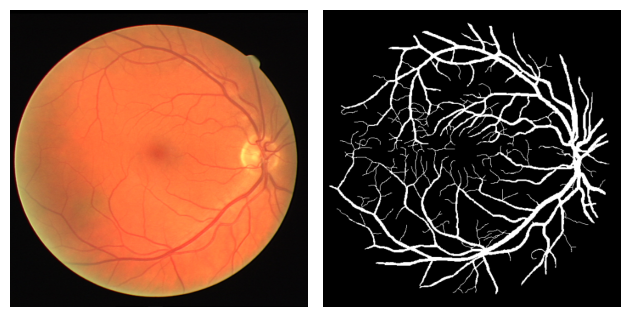

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(imgs[3])
ax1.axis('off')
ax2.imshow(masks[3], cmap= 'grey')
ax2.axis('off')
plt.tight_layout()
plt.show()

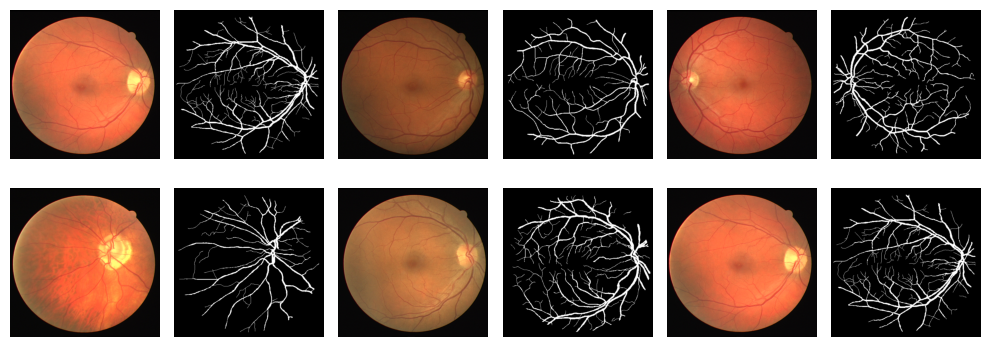

In [6]:
n = 6
cols = 3
rows = (n + cols - 1) // cols
fig, axes = plt.subplots(rows, cols * 2, figsize=(10, 2 * rows))
axes = axes.flatten()

np.random.seed(42)
for i in range(n):
    j = np.random.randint(len(imgs))
    axes[i * 2].imshow(imgs[j], cmap='gray')
    axes[i * 2].axis('off')
    axes[i * 2 + 1].imshow(masks[j], cmap='gray')
    axes[i * 2 + 1].axis('off')
plt.tight_layout()
plt.show()

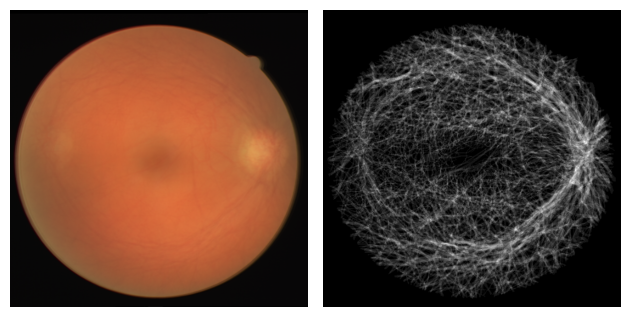

In [7]:
mean_img = np.mean(imgs, axis=0)
mean_mask = np.mean(masks, axis=0)
sd_img = np.std(imgs, axis=0)
sd_mask = np.std(masks, axis=0)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(mean_img)
ax1.axis('off')
ax2.imshow(mean_mask, cmap='gray')
ax2.axis('off')
plt.tight_layout()
plt.show()

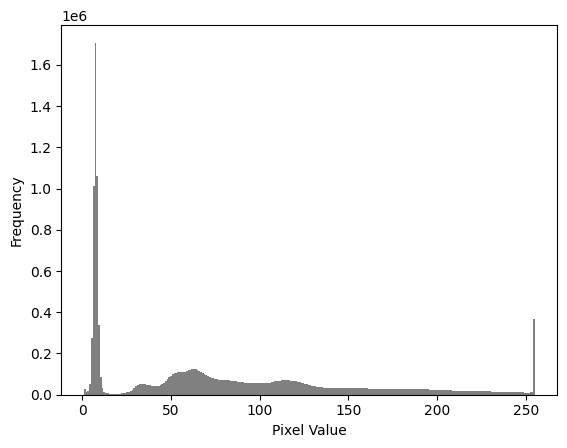

In [8]:
pixel_vals = np.concatenate([img.ravel() for img in imgs if img.max() > 0])
pixel_vals *= 255

# Create a histogram of non-black pixel values
plt.hist(pixel_vals, bins=256, range=(1, 255), color='gray', alpha=1)

# Customize the plot
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.grid(False)


plt.show()

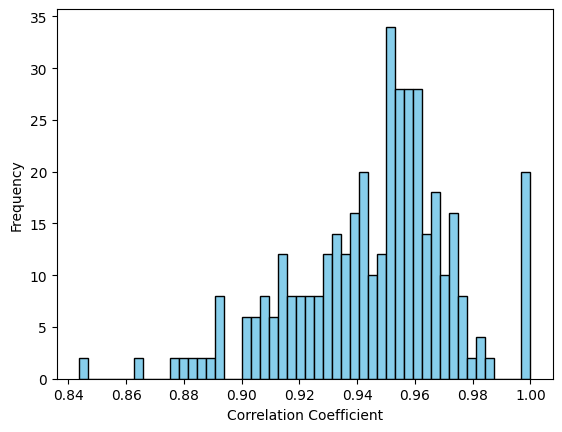

In [9]:
flattened_imgs = [img.ravel() for img in imgs]
correlation_matrix = np.corrcoef(flattened_imgs)
plt.hist(correlation_matrix.flatten(), bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.grid(False)

# Show the plot
plt.show()

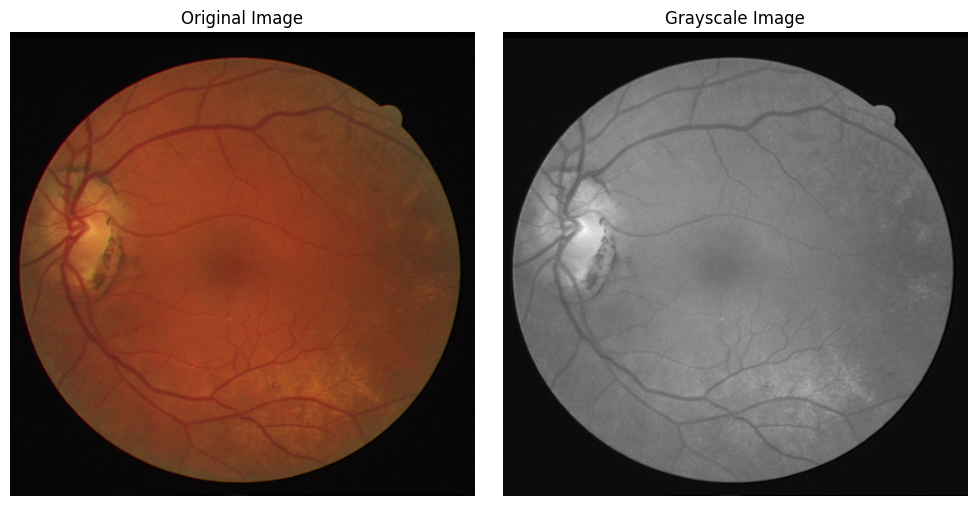

In [10]:
first_image = imgs[5]
grayscale_image = np.mean(first_image, axis=2)
grayscale_image_normalized = 255 * (grayscale_image - np.min(grayscale_image)) / (np.max(grayscale_image) - np.min(grayscale_image))
grayscale_image_uint8 = grayscale_image_normalized.astype(np.uint8)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(grayscale_image_uint8)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(first_image)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(grayscale_image_normalized, cmap='gray')
axes[1].set_title('Grayscale Image')
axes[1].axis('off')
plt.tight_layout()
plt.show()

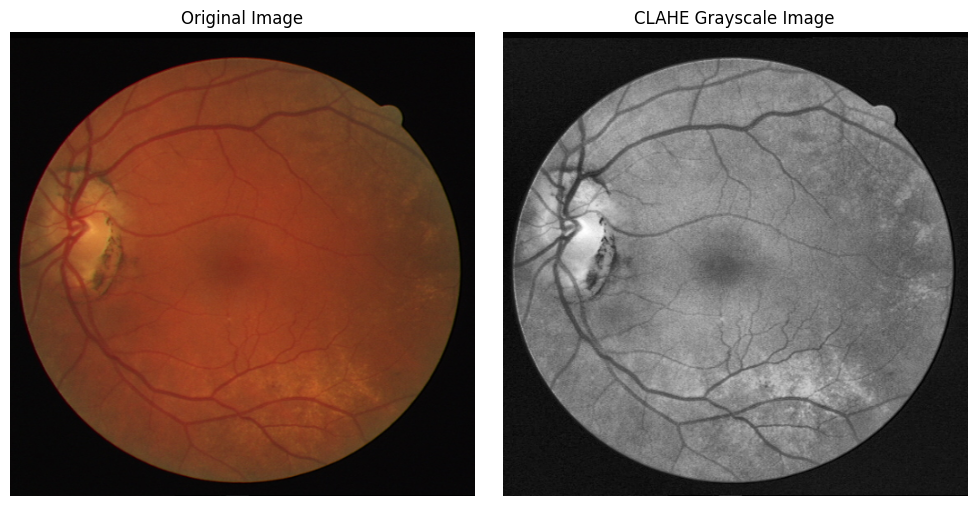

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(first_image)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(clahe_image, cmap='gray')
axes[1].set_title('CLAHE Grayscale Image')
axes[1].axis('off')
plt.tight_layout()
plt.show()

In [20]:
height = 512
width = 512

# Reading images
im_list = os.listdir('C:/Users/NavjeetHundal/Desktop/RetinalUNET2/eda')[4:10]
imgs = []
for im in im_list:
    im_path = os.path.join('C:/Users/NavjeetHundal/Desktop/RetinalUNET2/eda', im)
    img = plt.imread(im_path)
    imgs.append(img)


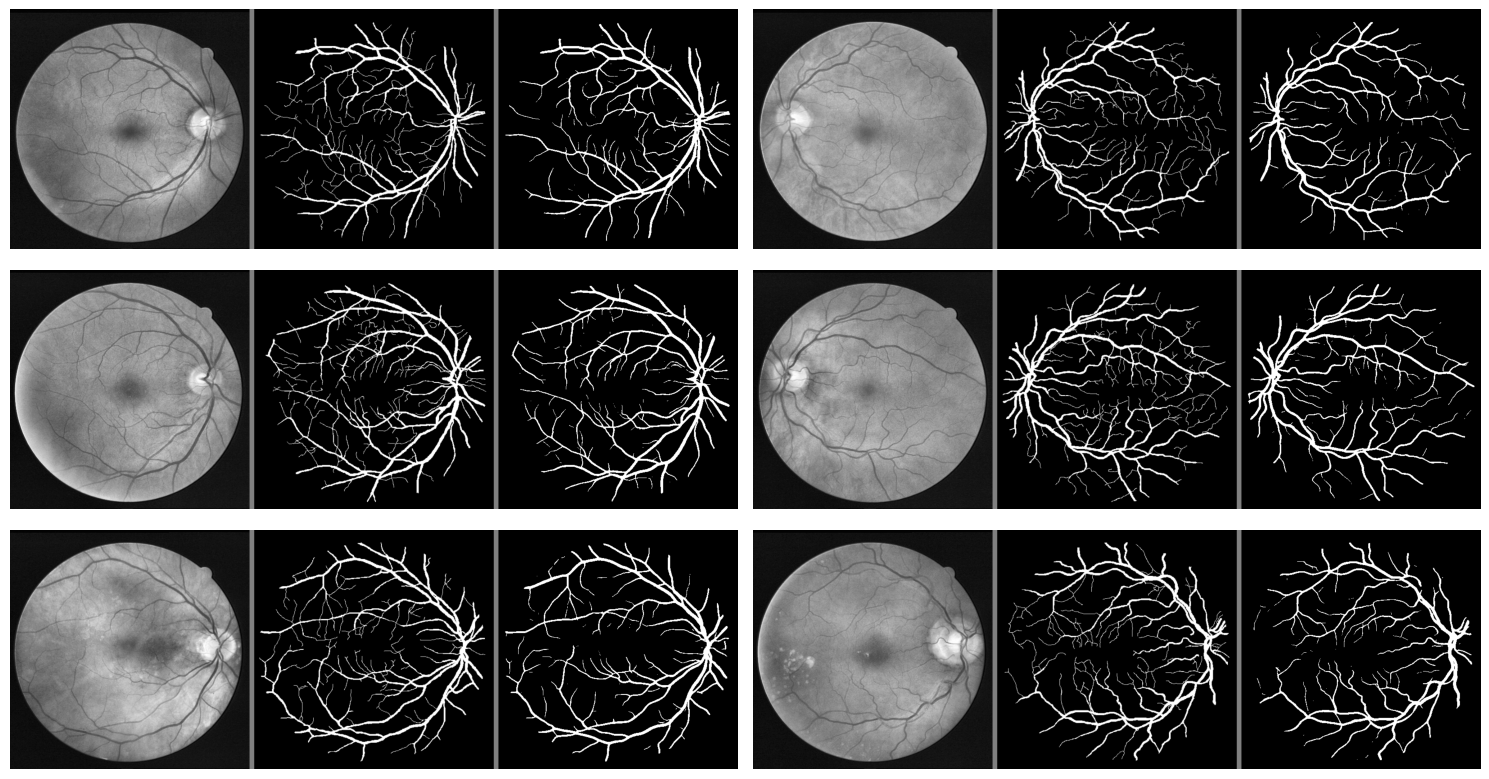

In [21]:
def plot_random_images(image_list, num_rows=3, num_cols=2):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    selected_images = random.sample(image_list, num_rows * num_cols)

    for i, ax in enumerate(axes.flatten()):
        image = selected_images[i]
        ax.imshow(image, cmap='gray')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

plot_random_images(imgs)

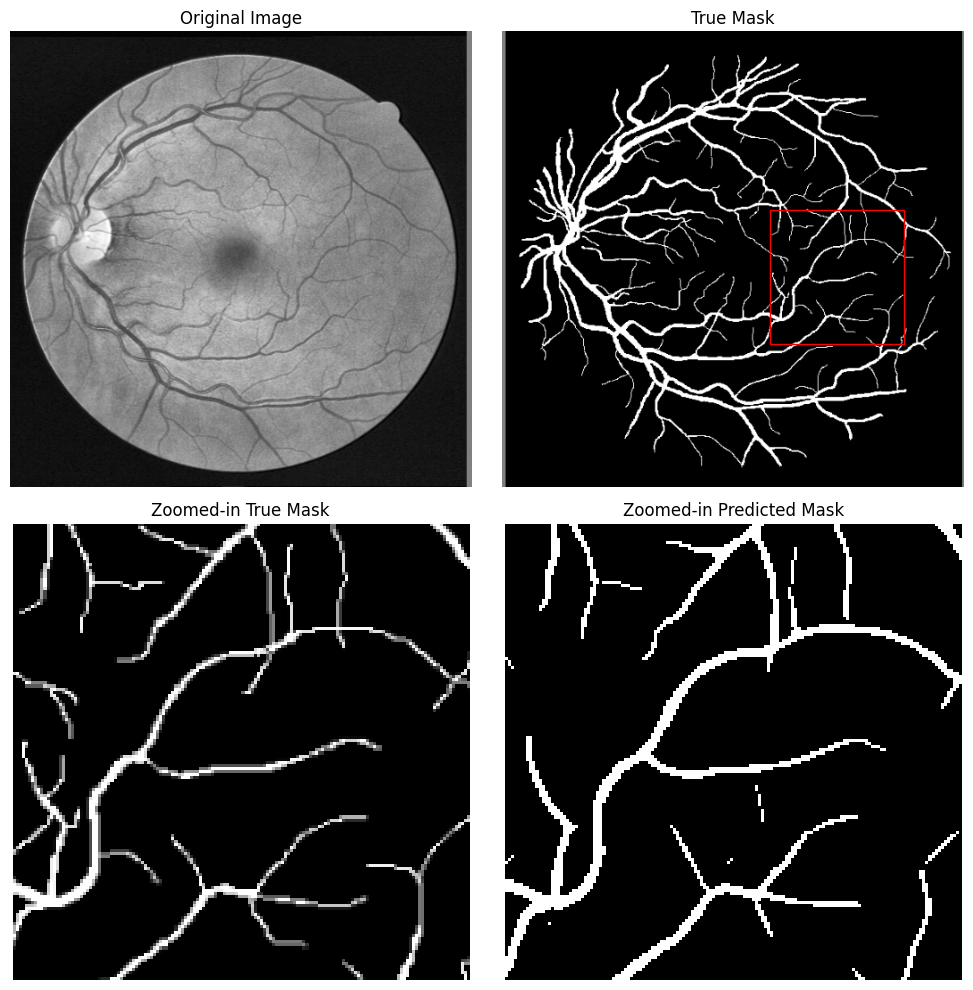

In [27]:
composite_image = cv2.imread(r'C:\Users\NavjeetHundal\Desktop\RetinalUNET2\eda\01_test.png') 
composite_image = cv2.cvtColor(composite_image, cv2.COLOR_BGR2RGB)

height, width, _ = composite_image.shape
part_width = width // 3

original_image = composite_image[:, :part_width]
true_mask = composite_image[:, part_width:2 * part_width, 0] 
predicted_mask = composite_image[:, 2 * part_width:, 0] 


x_start, y_start = 300, 200
zoom_width, zoom_height = 150, 150


zoomed_true_mask = true_mask[y_start:y_start + zoom_height, x_start:x_start + zoom_width]
zoomed_predicted_mask = predicted_mask[y_start:y_start + zoom_height, x_start:x_start + zoom_width]


fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(original_image)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')
axes[0, 1].imshow(true_mask, cmap='gray')
axes[0, 1].set_title('True Mask')
axes[0, 1].axis('off')
axes[1, 0].imshow(zoomed_true_mask, cmap='gray')
axes[1, 0].set_title('True')
axes[1, 0].axis('off')
axes[1, 1].imshow(zoomed_predicted_mask, cmap='gray')
axes[1, 1].set_title('Predicted')
axes[1, 1].axis('off')
rect = plt.Rectangle((x_start, y_start), zoom_width, zoom_height, edgecolor='red', facecolor='none')
axes[0, 1].add_patch(rect)

plt.tight_layout()
plt.show()